In [262]:
import pandas as pd

In [263]:
df = pd.read_csv('train (2).csv')
df = df.iloc[:,1:]

In [264]:
df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,0
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,1
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,0
3,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,0
4,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,0


In [265]:
df.Product_Info_2.unique()

array(['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3',
       'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'], dtype=object)

In [266]:
df.Response = pd.Series(np.where(df.Response == 1, 1, 0))

In [267]:
df.Response.value_counts()

0    44181
1    15200
Name: Response, dtype: int64

In [268]:
medical_keyword_cols=[col for col in df.columns if str(col).startswith("Medical_Keyword")]
medical_cols=[col for col in df.columns if str(col).startswith("Medical_History")]
product_info_cols =[col for col in df.columns if str(col).startswith("Product_Info")]
employment_info_cols=[col for col in df.columns if str(col).startswith("Employment_Info")]
insured_info_cols =[col for col in df.columns if str(col).startswith("InsuredInfo")]
insured_history_cols=[col for col in df.columns if str(col).startswith("Insurance_History")]
family_history_cols =[col for col in df.columns if str(col).startswith("Family_Hist")]

df['Total_Medical_Keyword']=df[medical_keyword_cols].sum(axis=1)
df['Total_Medical_History']=df[medical_cols].sum(axis=1)
df['Total_Product_Info']=df[product_info_cols].sum(axis=1)
df['Total_Employment_Info']=df[employment_info_cols].sum(axis=1)
df['Total_InsuredInfo']=df[insured_info_cols].sum(axis=1)
df['Total_Insurance_History']=df[insured_history_cols].sum(axis=1)
df['Total_Family_Hist']=df[family_history_cols].sum(axis=1)

In [269]:
kolom_terpilih = ["Ins_Age", "Ht", "Wt", "BMI", 'Total_Medical_Keyword', 'Total_Medical_History', 'Total_Product_Info', 'Total_Employment_Info', 'Total_InsuredInfo', 'Total_Insurance_History', 'Total_Family_Hist', "Response"]
data = df[kolom_terpilih]

In [270]:
data.shape

(59381, 12)

In [271]:
data.head()

,Ins_Age,Ht,Wt,BMI,Total_Medical_Keyword,Total_Medical_History,Total_Product_Info,Total_Employment_Info,Total_InsuredInfo,Total_Insurance_History,Total_Family_Hist,Response
0,0.641791,0.581818,0.148536,0.323008,0,430.0,15.076923,16.0280,16,10.000667,3.124825,0
1,0.059701,0.600000,0.131799,0.272288,0,487.0,33.076923,6.0018,16,13.000133,2.272913,1
2,0.029851,0.745455,0.288703,0.428780,0,88.0,33.076923,12.0600,17,15.000000,3.529700,0
3,0.164179,0.672727,0.205021,0.352438,1,425.0,17.487179,13.2420,19,15.000000,3.772403,0
4,0.417910,0.654545,0.234310,0.424046,0,237.0,33.230769,12.0770,16,15.000000,2.872219,0


In [272]:
data=data.dropna()
data=data.drop_duplicates()

In [273]:
from sklearn.cross_validation import train_test_split
Y=data['Response']
X=data.drop(columns = ['Response'])

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

train=pd.concat([Y_train,X_train],axis=1)
test=pd.concat([Y_test,X_test],axis=1)

train.to_csv('TrainData1.csv',index=False )
test.to_csv('TestData1.csv',index=False )

In [225]:
import scipy.stats as stats
import numpy as np
def mono_bin(Y,X,n):
    good=Y.sum()
    bad=Y.count()-good
    r=0
    while np.abs(r)<1:
        d1=pd.DataFrame({'X':X,'Y':Y,'Bucket':pd.qcut(X,n)})
        d2=d1.groupby(['Bucket'])
        r,p=stats.spearmanr(d2['X'].mean(),d2['Y'].mean())
        n=n-1
 #also got some d2 and n
    print(r,n)
    d3=pd.DataFrame(d2['X'].min(),columns=['min'])
    d3['min']=d2['X'].min()
    d3['max']=d2['X'].max()
    d3['sum']=d2['Y'].sum()
    d3['total']=d2['Y'].count()
    d3['rate']=d2['Y'].mean()
    d3['goodattribute']=d3['sum']/good
    d3['badattribute']=(d3['total']-d3['sum'])/bad
    d3['woe']=np.log(d3['goodattribute']/d3['badattribute'])
    iv=((d3['goodattribute']-d3['badattribute'])*d3['woe']).sum()
    d4=d3.sort_index(by='min')
    woe=list(d4['woe'].values)
    print(d4)
    print('-'*30)
    cut=[]
    #float('inf')  For infinity, instead of writing inf directly
    cut.append(float('-inf'))
    for i in range(1,n+1):
        qua=X.quantile(i/(n+1))
        cut.append(round(qua,4))
    cut.append(float('inf'))
    return d4,iv,woe,cut
 #cut XTake his quartile becauseYonly0  1    Nor can you take the quartile. n=3Because there is finally n-1So it is actually divided into four buckets, woe is four values. Goodattribute is a good attribute
dfx1,ivx1,woex1,cutx1=mono_bin(train['Response'],train['Ins_Age'],n=10)
dfx2,ivx2,woex2,cutx2=mono_bin(train['Response'],train['Ht'],n=10)
dfx3,ivx3,woex3,cutx3=mono_bin(train['Response'],train['Wt'],n=10)
dfx4,ivx4,woex4,cutx4=mono_bin(train['Response'],train['BMI'],n=10)
#dfx5,ivx5,woex5,cutx5=mono_bin(train['Response'],train['Total_Medical_Keyword'],n=10)
dfx6,ivx6,woex6,cutx6=mono_bin(train['Response'],train['Total_Medical_History'],n=10)
#dfx7,ivx7,woex7,cutx7=mono_bin(train['Response'],train['Total_Product_Info'],n=10)
dfx8,ivx8,woex8,cutx8=mono_bin(train['Response'],train['Total_Employment_Info'],n=10)
#dfx9,ivx9,woex9,cutx9=mono_bin(train['Response'],train['Total_InsuredInfo'],n=10)
#dfx10,ivx10,woex10,cutx10=mono_bin(train['Response'],train['Total_Insurance_History'],n=10)
dfx11,ivx11,woex11,cutx11=mono_bin(train['Response'],train['Total_Family_Hist'],n=10)

1.0 7
                      min       max   sum  total      rate  goodattribute  \
Bucket                                                                      
(-0.001, 0.164]  0.000000  0.164179  1055   5652  0.186660       0.099388   
(0.164, 0.239]   0.179104  0.238806   955   5070  0.188363       0.089967   
(0.239, 0.328]   0.253731  0.328358  1138   5526  0.205936       0.107207   
(0.328, 0.403]   0.343284  0.402985  1036   4624  0.224048       0.097598   
(0.403, 0.493]   0.417910  0.492537  1561   5891  0.264980       0.147056   
(0.493, 0.567]   0.507463  0.567164  1422   5062  0.280917       0.133961   
(0.567, 0.657]   0.582090  0.656716  1602   5171  0.309805       0.150919   
(0.657, 1.0]     0.671642  1.000000  1846   4479  0.412146       0.173905   

                 badattribute       woe  
Bucket                                   
(-0.001, 0.164]      0.148963 -0.404670  
(0.164, 0.239]       0.133344 -0.393490  
(0.239, 0.328]       0.142191 -0.282408  
(0.328, 0.403

C:\Users\topikz064115\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


                      min       max   sum  total      rate  goodattribute  \
Bucket                                                                      
(-0.001, 0.336]  0.000000  0.336403   766   4611  0.166124       0.072162   
(0.336, 0.377]   0.336618  0.376858   833   4621  0.180264       0.078474   
(0.377, 0.41]    0.376884  0.409648   878   4598  0.190953       0.082713   
(0.41, 0.439]    0.409726  0.438930  1025   4620  0.221861       0.096561   
(0.439, 0.467]   0.438952  0.466858  1076   4657  0.231050       0.101366   
(0.467, 0.501]   0.466943  0.501138  1148   4551  0.252252       0.108149   
(0.501, 0.547]   0.501162  0.546621  1220   4616  0.264298       0.114932   
(0.547, 0.62]    0.546823  0.619684  1376   4643  0.296360       0.129628   
(0.62, 1.0]      0.619706  1.000000  2293   4558  0.503072       0.216015   

                 badattribute       woe  
Bucket                                   
(-0.001, 0.336]      0.124595 -0.546154  
(0.336, 0.377]       0.122

In [259]:
def self_bin(Y,X,cat):
    good=Y.sum()
    bad=Y.count()-good
    d1=pd.DataFrame({'X':X,'Y':Y,'Bucket':pd.cut(X,cat)})
    d2=d1.groupby(['Bucket'])
    d3=pd.DataFrame(d2['X'].min(),columns=['min'])
    d3['min']=d2['X'].min()
    d3['max']=d2['X'].max()
    d3['sum']=d2['Y'].sum()
    d3['total']=d2['Y'].count()
    d3['rate']=d2['Y'].mean()
    d3['goodattribute']=d3['sum']/good
    d3['badattribute']=(d3['total']-d3['sum'])/bad
    d3['woe']=np.log(d3['goodattribute']/d3['badattribute'])
    iv=((d3['goodattribute']-d3['badattribute'])*d3['woe']).sum()
    d4=d3.sort_index(by='min')
    print(d4)
    print('-'*40)
    woe=list(d3['woe'].values)
    return d4,iv,woe

ninf=float('-inf')
pinf=float('inf')
cutx5=[ninf,0,1,3,5,pinf]
cutx7 = [ninf,4,8,12,16,pinf]
cutx9 = [ninf,7,14,21,42,pinf]
cutx10 = [ninf,8,12,16,19,pinf]

    
dfx5,ivx5,woex5=self_bin(train['Response'],train['Total_Medical_Keyword'],cutx5)
dfx7, ivx7 ,woex7= self_bin(train['Response'], train['Total_Product_Info'], cutx7)
dfx9, ivx9,woex9 = self_bin(train['Response'], train['Total_InsuredInfo'], cutx9)
dfx10, ivx10,woex10 = self_bin(train['Response'], train['Total_Insurance_History'], cutx10)

             min  max   sum  total      rate  goodattribute  badattribute  \
Bucket                                                                      
(-inf, 0.0]    0    0  2492  16427  0.151701       0.234762      0.451555   
(0.0, 1.0]     1    1  2728  11226  0.243007       0.256995      0.275373   
(1.0, 3.0]     2    3  3606  10252  0.351736       0.339708      0.215360   
(3.0, 5.0]     4    5  1365   2852  0.478612       0.128592      0.048185   
(5.0, inf]     6   16   424    718  0.590529       0.039943      0.009527   

                  woe  
Bucket                 
(-inf, 0.0] -0.654125  
(0.0, 1.0]  -0.069069  
(1.0, 3.0]   0.455777  
(3.0, 5.0]   0.981587  
(5.0, inf]   1.433346  
----------------------------------------
                    min        max    sum  total      rate  goodattribute  \
Bucket                                                                      
(8.0, 12.0]    9.000000  11.487179     21     46  0.456522       0.001978   
(12.0, 16.0]  13.076

C:\Users\topikz064115\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  app.launch_new_instance()


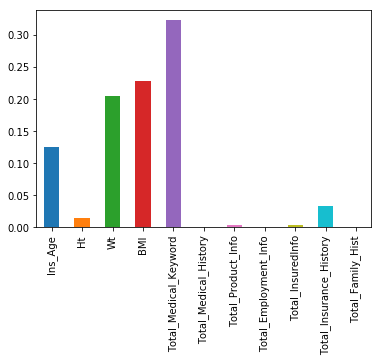

In [292]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (15,8))
ivall=pd.Series([ivx1,ivx2,ivx3,ivx4,ivx5,ivx6,ivx7,ivx8,ivx9,ivx10,ivx11],index=['Ins_Age','Ht','Wt','BMI',
                                                                                  'Total_Medical_Keyword','Total_Medical_History'
                                                                            ,'Total_Product_Info',
                                                                                  'Total_Employment_Info',
                                                                                  'Total_InsuredInfo',
                                                                                  'Total_Insurance_History',
                                                                                  'Total_Family_Hist'])

plt.figure(figsize = (15,8))
fig=plt.figure()
ax1=fig.add_subplot(111)
ivall.plot(kind='bar',ax=ax1)
plt.show()

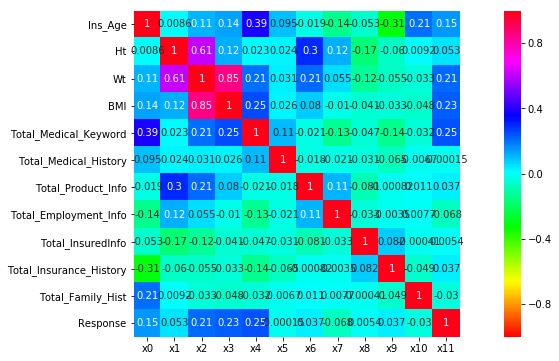

In [277]:
import seaborn as sns
corr=data.corr()
xticks = ['x0','x1','x2','x3','x4','x5','x6','x7','x8','x9','x10', 'x11']
fig=plt.figure()
fig.set_size_inches(16,6)
ax1=fig.add_subplot(111)
 # default is0To1Customizable settings for vmin and vmax
sns.heatmap(corr,vmin=-1, vmax=1 ,cmap='hsv', annot=True, square=True)
ax1.set_xticklabels(xticks,rotation= 0)
plt.show()

In [255]:
data = pd.read_csv('TrainData1.csv')
#value>=cut[0]=Negative infinity, yes
from pandas import Series
def replace_woe(series,cut,woe):
    list=[]
    i=0
    while i<len(series):
        valuek=series[i]
        j=len(cut)-2
        m=len(cut)-2
        while j>=0:
            if valuek>=cut[j]:
                j=-1
            else:
                j -=1
                m -= 1
        list.append(woe[m])
        i += 1
    return list

In [256]:
#  is the first kind of reverse,
data['Ins_Age'] = Series(replace_woe(data['Ins_Age'], cutx1, woex1))
data['Ht'] = Series(replace_woe(data['Ht'], cutx2, woex2))
data['Wt'] = Series(replace_woe(data['Wt'], cutx3, woex3))
data['BMI'] = Series(replace_woe(data['BMI'], cutx4, woex4))
data['Total_Medical_Keyword'] = Series(replace_woe(data['Total_Medical_Keyword'], cutx5, woex5))
data['Total_Medical_History'] = Series(replace_woe(data['Total_Medical_History'], cutx6, woex6))
data['Total_Product_Info'] = Series(replace_woe(data['Total_Product_Info'], cutx7, woex7))
data['Total_Employment_info'] = Series(replace_woe(data['Total_Employment_Info'], cutx8, woex8))
data['Total_InsuredInfo'] = Series(replace_woe(data['Total_InsuredInfo'], cutx9, woex9))
data['Total_Insurance_History'] = Series(replace_woe(data['Total_Insurance_History'], cutx10, woex10))
data['Total_Family_Hist'] = Series(replace_woe(data['Total_Family_Hist'], cutx11, woex11))

In [257]:
test= pd.read_csv('TestData1.csv')
         # woe
test['Ins_Age'] = Series(replace_woe(data['Ins_Age'], cutx1, woex1))
test['Ht'] = Series(replace_woe(data['Ht'], cutx2, woex2))
test['Wt'] = Series(replace_woe(data['Wt'], cutx3, woex3))
test['BMI'] = Series(replace_woe(data['BMI'], cutx4, woex4))
test['Total_Medical_Keyword'] = Series(replace_woe(data['Total_Medical_Keyword'], cutx5, woex5))
test['Total_Medical_History'] = Series(replace_woe(data['Total_Medical_History'], cutx6, woex6))
test['Total_Product_Info'] = Series(replace_woe(data['Total_Product_Info'], cutx7, woex7))
test['Total_Employment_info'] = Series(replace_woe(data['Total_Employment_Info'], cutx8, woex8))
test['Total_InsuredInfo'] = Series(replace_woe(data['Total_InsuredInfo'], cutx9, woex9))
test['Total_Insurance_History'] = Series(replace_woe(data['Total_Insurance_History'], cutx10, woex10))
test['Total_Family_Hist'] = Series(replace_woe(data['Total_Family_Hist'], cutx11, woex11))

In [258]:
import statsmodels.api as sm
Y=data['Response']
#X=data.drop(['Response','Ht', 'Total_Medical_History', 'Total_Product_Info', 'Total_Employment_Info','Total_InsuredInfo', 'Total_Insurance_History', 'Total_Family_Hist'],axis=1)
X=data.drop(['Response'],axis=1)
X1=sm.add_constant(X)
logit=sm.Logit(Y,X1)
result=logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.519160
         Iterations 6


LinAlgError: Singular matrix

In [239]:
data.head()

,Response,Ins_Age,Ht,Wt,BMI,Total_Medical_Keyword,Total_Medical_History,Total_Product_Info,Total_Employment_Info,Total_InsuredInfo,Total_Insurance_History,Total_Family_Hist
0,0,0.716418,0.672727,0.288703,0.504999,1,474.0,33.282051,6.750,13,12.001067,3.854867
1,0,0.238806,0.709091,0.424686,0.698751,0,577.0,33.487179,12.550,20,15.000000,2.743172
2,0,0.388060,0.654545,0.297071,0.542014,1,550.0,36.487179,7.025,16,15.000000,4.143499
3,0,0.537313,0.618182,0.152720,0.299854,0,237.0,33.179487,12.060,19,14.000400,4.209559
4,0,0.089552,0.781818,0.351464,0.491491,0,577.0,33.487179,5.165,12,13.000267,3.501531


In [101]:
def missing_value(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
    return missing_value_df.sort_values('percent_missing', ascending = False).reset_index()


In [102]:
missing_value(df)

,index,column_name,percent_missing
0,Medical_History_10,Medical_History_10,99.061990
1,Medical_History_32,Medical_History_32,98.135767
2,Medical_History_24,Medical_History_24,93.598963
3,Medical_History_15,Medical_History_15,75.101463
4,Family_Hist_5,Family_Hist_5,70.411411
5,Family_Hist_3,Family_Hist_3,57.663226
6,Family_Hist_2,Family_Hist_2,48.257860
7,Insurance_History_5,Insurance_History_5,42.767889
8,Family_Hist_4,Family_Hist_4,32.306630
9,Employment_Info_6,Employment_Info_6,18.278574


In [103]:
df.shape

(59381, 127)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 57.5+ MB


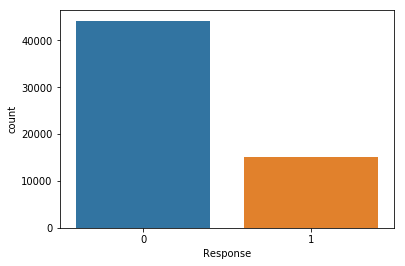

In [105]:
import seaborn as sns
sns.countplot(df['Response'])

In [106]:
df['Response'].value_counts()

0    44181
1    15200
Name: Response, dtype: int64

In [107]:
# 74.4% untuk 0, 25.6% untuk 1

In [108]:
df = df.drop(columns = ['Medical_History_10','Medical_History_32','Medical_History_24','Medical_History_15',
                        'Family_Hist_5','Family_Hist_3','Family_Hist_2','Family_Hist_4','Insurance_History_5'])

In [109]:
df.shape

(59381, 118)

In [110]:
missing_value(df)

,index,column_name,percent_missing
0,Employment_Info_6,Employment_Info_6,18.278574
1,Medical_History_1,Medical_History_1,14.969435
2,Employment_Info_4,Employment_Info_4,11.416110
3,Employment_Info_1,Employment_Info_1,0.031997
4,Medical_Keyword_20,Medical_Keyword_20,0.000000
5,Medical_Keyword_19,Medical_Keyword_19,0.000000
6,Medical_Keyword_18,Medical_Keyword_18,0.000000
7,Medical_Keyword_17,Medical_Keyword_17,0.000000
8,Medical_Keyword_16,Medical_Keyword_16,0.000000
9,Medical_Keyword_15,Medical_Keyword_15,0.000000


In [111]:
df['Employment_Info_6'] = df['Employment_Info_6'].fillna(df['Employment_Info_6'].mean())

In [112]:
df['Employment_Info_4'] = df['Employment_Info_4'].fillna(df['Employment_Info_4'].mean())

In [113]:
df['Employment_Info_1'] = df['Employment_Info_1'].fillna(df['Employment_Info_1'].mean())

In [114]:
df['Medical_History_1'] = df['Medical_History_1'].fillna(df['Medical_History_1'].mean())

In [120]:
df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,0
1,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,1
2,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,0
3,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,0
4,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,0


In [121]:
import pandas
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder
df['Product_Info_2'] = le.fit_transform(df.Product_Info_3.values)

In [122]:
df.head()

,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,8,10,0.076923,2,1,1,0.641791,0.581818,0.148536,...,0,0,0,0,0,0,0,0,0,0
1,1,22,26,0.076923,2,3,1,0.059701,0.600000,0.131799,...,0,0,0,0,0,0,0,0,0,1
2,1,22,26,0.076923,2,3,1,0.029851,0.745455,0.288703,...,0,0,0,0,0,0,0,0,0,0
3,1,8,10,0.487179,2,3,1,0.164179,0.672727,0.205021,...,0,0,0,0,0,0,0,0,0,0
4,1,22,26,0.230769,2,3,1,0.417910,0.654545,0.234310,...,0,0,0,0,0,0,0,0,0,0


In [126]:
X = df.drop(columns=['Response'])
y = df.Response

In [127]:
import statsmodels.api as sm
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    pvalpar = []
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            pvalpar.append(best_pval)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            #pvalpar.remove(worst_pval)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    #d = {'Feature':included,'pval':pvalpar}
    return included

C:\Users\topikz064115\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [128]:
result = stepwise_selection(X, y, 
                       initial_list=X.columns, 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True)

C:\Users\topikz064115\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


Drop Product_Info_1                 with p-value 0.969291
Drop Medical_Keyword_32             with p-value 0.951054
Drop Medical_Keyword_36             with p-value 0.903645
Drop Medical_Keyword_5              with p-value 0.872071
Drop Medical_History_6              with p-value 0.846545
Drop Medical_Keyword_23             with p-value 0.84132
Drop Family_Hist_1                  with p-value 0.818379
Drop Medical_Keyword_8              with p-value 0.806588
Drop Product_Info_2                 with p-value 0.80781
Drop Medical_History_36             with p-value 0.728144
Drop Medical_Keyword_1              with p-value 0.698394
Drop Employment_Info_1              with p-value 0.690347
Drop Medical_Keyword_21             with p-value 0.637781
Drop Insurance_History_9            with p-value 0.622686
Drop Medical_History_9              with p-value 0.58825
Drop Employment_Info_6              with p-value 0.595266
Drop Medical_Keyword_13             with p-value 0.569142
Drop Medical_Keyw

In [137]:
df2 = df[result]

In [142]:
df2.to_csv('datafinal.csv')

In [148]:
final_data = pd.concat([df2, df.Response], axis = 1)

In [151]:
final_data.to_csv('finaldata.csv')